In [4]:
import pandas as pd

file_name = "amazon_sales_dataset_2019_2024_corrected.xlsx"
df = pd.read_excel(file_name)
df['Order Date'] = pd.to_datetime(df['Order Date'])
start_date = '2024-10-01'
end_date = '2024-12-31'
target_status = 'Completed'
df_completed = df[df['Order Status'] == target_status].copy()
df_final_filtered = df_completed[(df_completed['Order Date'] >= start_date) & (df_completed['Order Date'] <= end_date)].copy()

print(f"Total Completed Orders in Q4 2024: {df_final_filtered.shape[0]} rows")
output_file_name = 'amazon_q4_2024_completed_sales_filtered.csv'
df_final_filtered.to_csv(output_file_name, index=False)
print(f"Saved cleaned and filtered data to: {output_file_name}")


print(df_final_filtered.head())

Total Completed Orders in Q4 2024: 56 rows
Saved cleaned and filtered data to: amazon_q4_2024_completed_sales_filtered.csv
                                  Order ID Order Date  \
4780  3b26b42d-8ede-4bd2-8fa6-66b4f30d06b9 2024-10-01   
4782  4e8bd212-1c54-448f-8106-474d9628a6a5 2024-10-02   
4784  7f52713d-3c26-45d2-9a71-1992e39c2a2a 2024-10-03   
4789  9b94d874-62ee-4dba-8fde-f3f7e32e6824 2024-10-04   
4790  88db6644-1cf2-46a3-95d0-736197802445 2024-10-04   

                               Customer ID    Customer Name         Region  \
4780  10c153ff-3044-4b10-82e4-76f763c75eb3      Alicia Long  North America   
4782  152a10bd-1d87-418c-af22-ad230c8ae1c1   Curtis Johnson      Australia   
4784  1df1ebda-c289-474d-95bb-c3ae08dc01c2     Whitney Moss           Asia   
4789  f518ce01-8083-473f-bb16-2b562dba5eb6  Joseph Arellano         Europe   
4790  99854151-3793-411a-8a6d-2d2d4888a969  Troy Graham Jr.  North America   

     Product Category Product Name  Quantity Sold  Unit Price  Di

--- SQL Aggregation Results (Revenue by Region and Category) ---
           Region Product Category  Total_Revenue
0            Asia   Home & Kitchen        4987.15
1            Asia         Clothing        4278.12
2            Asia           Sports        2332.13
3            Asia           Beauty        2292.49
4            Asia      Electronics        1253.48
5       Australia   Home & Kitchen        5775.32
6       Australia      Electronics        3931.62
7       Australia         Clothing        3261.93
8       Australia            Books         361.33
9       Australia             Toys         151.92
10         Europe         Clothing        4553.67
11         Europe           Beauty        1382.38
12         Europe            Books        1139.55
13         Europe      Electronics        1128.00
14         Europe             Toys         936.17
15         Europe           Sports         552.96
16  North America         Clothing        6317.68
17  North America      Electronics 

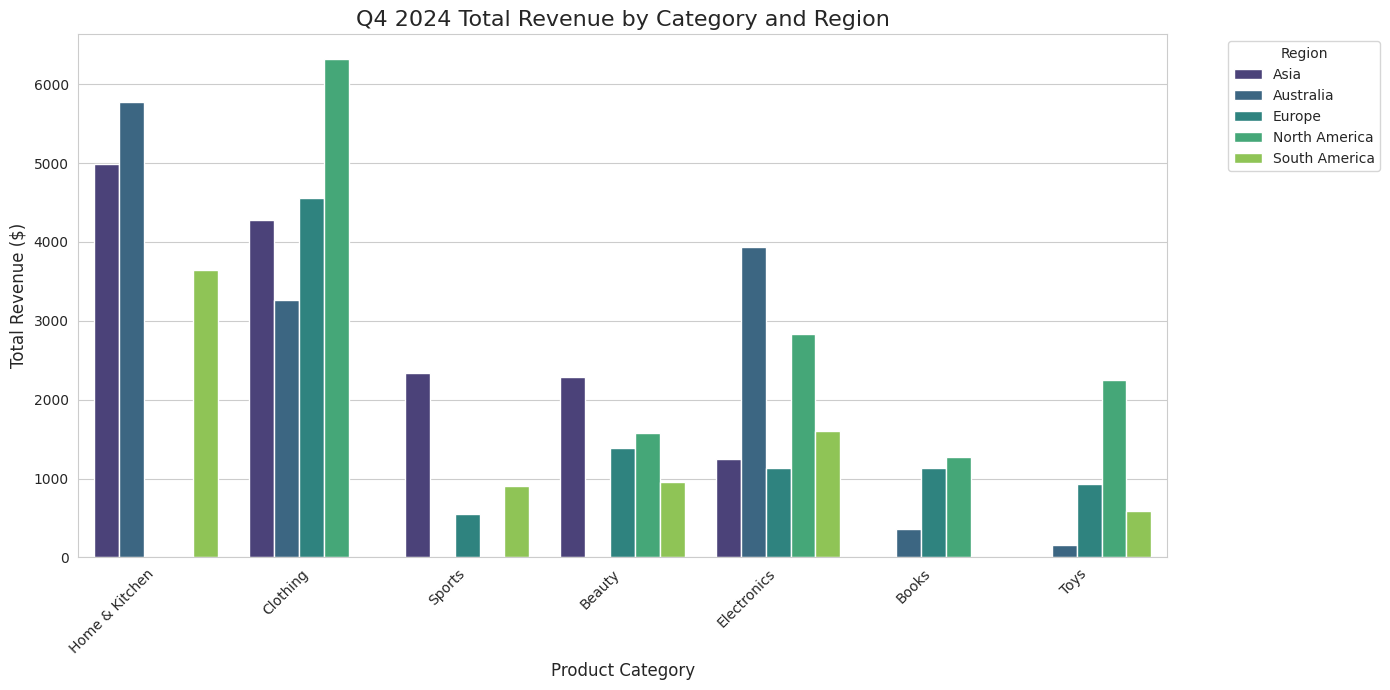

In [5]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

file_name = 'amazon_q4_2024_completed_sales_filtered.csv'
table_name = 'q4_sales_data'

df = pd.read_csv(file_name)

try:
    df_cleaned = pd.read_csv(file_name)
except FileNotFoundError:
    print({file_name})
    raise

conn = sqlite3.connect('amazon_sales_data.db')
df_cleaned.to_sql(table_name, conn, if_exists='replace', index=False)

sql_query = f"""
SELECT
    Region,
    "Product Category",
    SUM("Total Sales") AS Total_Revenue
FROM
    "{table_name}"
GROUP BY
    Region,
    "Product Category"
ORDER BY
    Region,
    Total_Revenue DESC;
"""

results_df = pd.read_sql_query(sql_query, conn)

conn.close()

print("--- SQL Aggregation Results (Revenue by Region and Category) ---")
print(results_df)

sns.set_style("whitegrid")
plt.figure(figsize=(14, 7))

sns.barplot(
    data=results_df,
    x='Product Category',
    y='Total_Revenue',
    hue='Region',
    palette='viridis',
    errorbar=None
)

plt.title('Q4 2024 Total Revenue by Category and Region', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total Revenue ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

visualization_file = 'q4_2024_regional_revenue_bar_chart.png'
plt.savefig(visualization_file)
print(f"\nVisualization saved to: {visualization_file}")

top_overall_categories = results_df.sort_values(by='Total_Revenue', ascending=False).head(3)
print("\n--- Top 3 Overall Performing Category-Region Combinations ---")
print(top_overall_categories)